In [1]:
## Vamos a establecer el directorio
setwd("/home/jovyan/work/anova/02/demos/datasets")
## Con ggplot2
install.packages(c('ggplot2','ggpubr','plyr','readxl'))

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



# Tomaremos un conjunto de datos disponible en Kaggle 
## https://www.kaggle.com/ionaskel/laptop-prices

In [2]:
## Con ggplot2
library(ggplot2)
theme_set(theme_gray(base_size = 25))
library(ggpubr)
library(plyr)
library(readxl)


Attaching package: ‘plyr’


The following object is masked from ‘package:ggpubr’:

    mutate




In [3]:
options(repr.plot.width=12, repr.plot.height=8)

In [4]:
laptop_price <- read.csv('laptops.csv',stringsAsFactors = F)

In [5]:
head(laptop_price,5)

,X,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
2,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
3,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
4,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
5,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [6]:
dim(laptop_price)

[1] 1303   13

In [7]:
colSums(is.na(laptop_price))

X          Company          Product         TypeName 
               0                0                0                0 
          Inches ScreenResolution              Cpu              Ram 
               0                0                0                0 
          Memory              Gpu            OpSys           Weight 
               0                0                0                0 
     Price_euros 
               0

In [8]:
summary(laptop_price$Price_euros)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    174     599     977    1124    1488    6099 

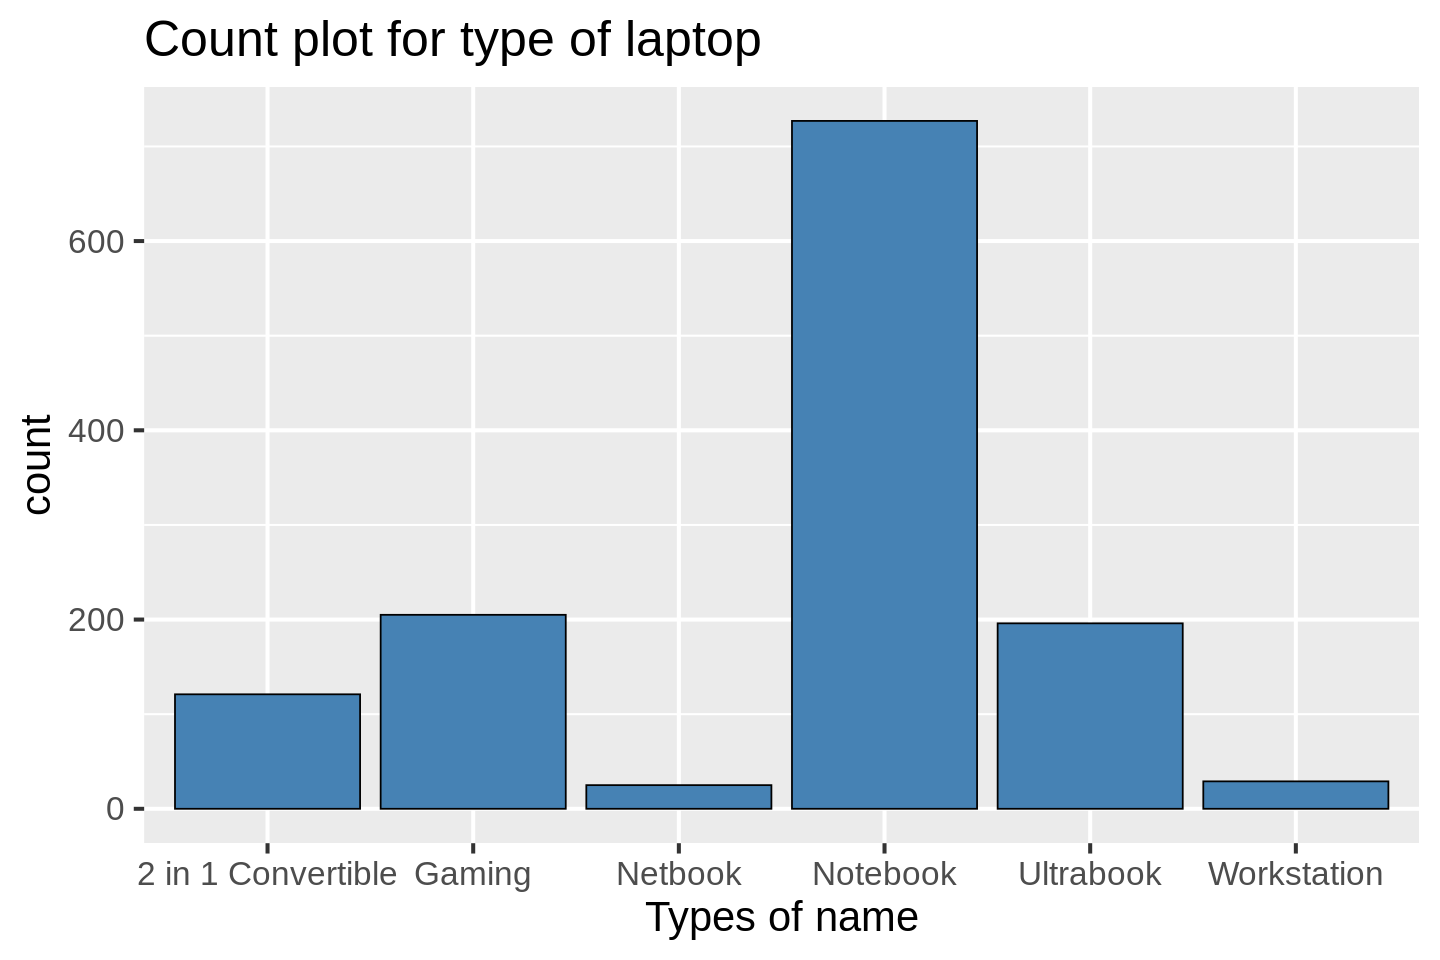

In [9]:
ggplot(data = laptop_price,
      aes(factor(x=TypeName))) +
      geom_bar(col='black', fill = 'steelblue')+
      ggtitle("Count plot for type of laptop")+
      xlab('Types of name')+
      ylab('count')

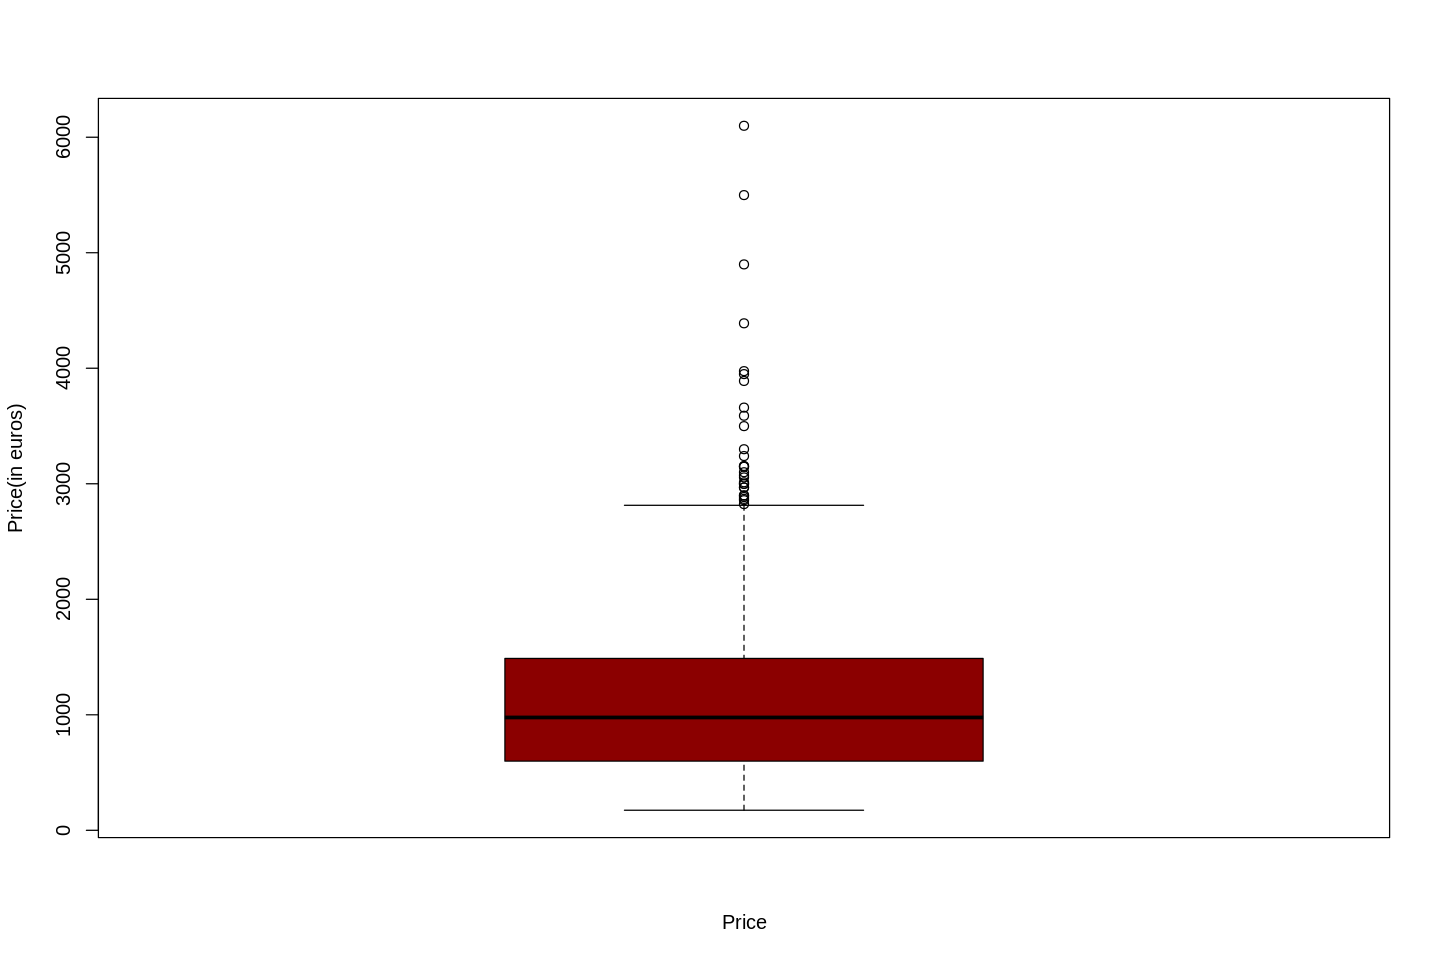

In [10]:
price_boxplot <- boxplot(laptop_price$Price_euros, col='darkred',
                  xlab = 'Price',
                  ylab = 'Price(in euros)')

#### Eliminando valores atipicos

In [11]:
price_boxplot$out

[1] 2858.00 2824.00 6099.00 3055.00 3890.00 2999.00 2884.86 2968.00 3012.77
[10] 2999.00 4899.00 3147.37 3659.40 3299.00 4389.00 2868.99 2899.00 3588.80
[19] 5499.00 3072.89 3100.00 3154.00 3149.00 2968.00 3975.00 3240.00 2899.00
[28] 3949.40 3499.00

In [12]:
laptop_price_processed<-laptop_price[-which(laptop_price$Price_euros %in% price_boxplot$out),]

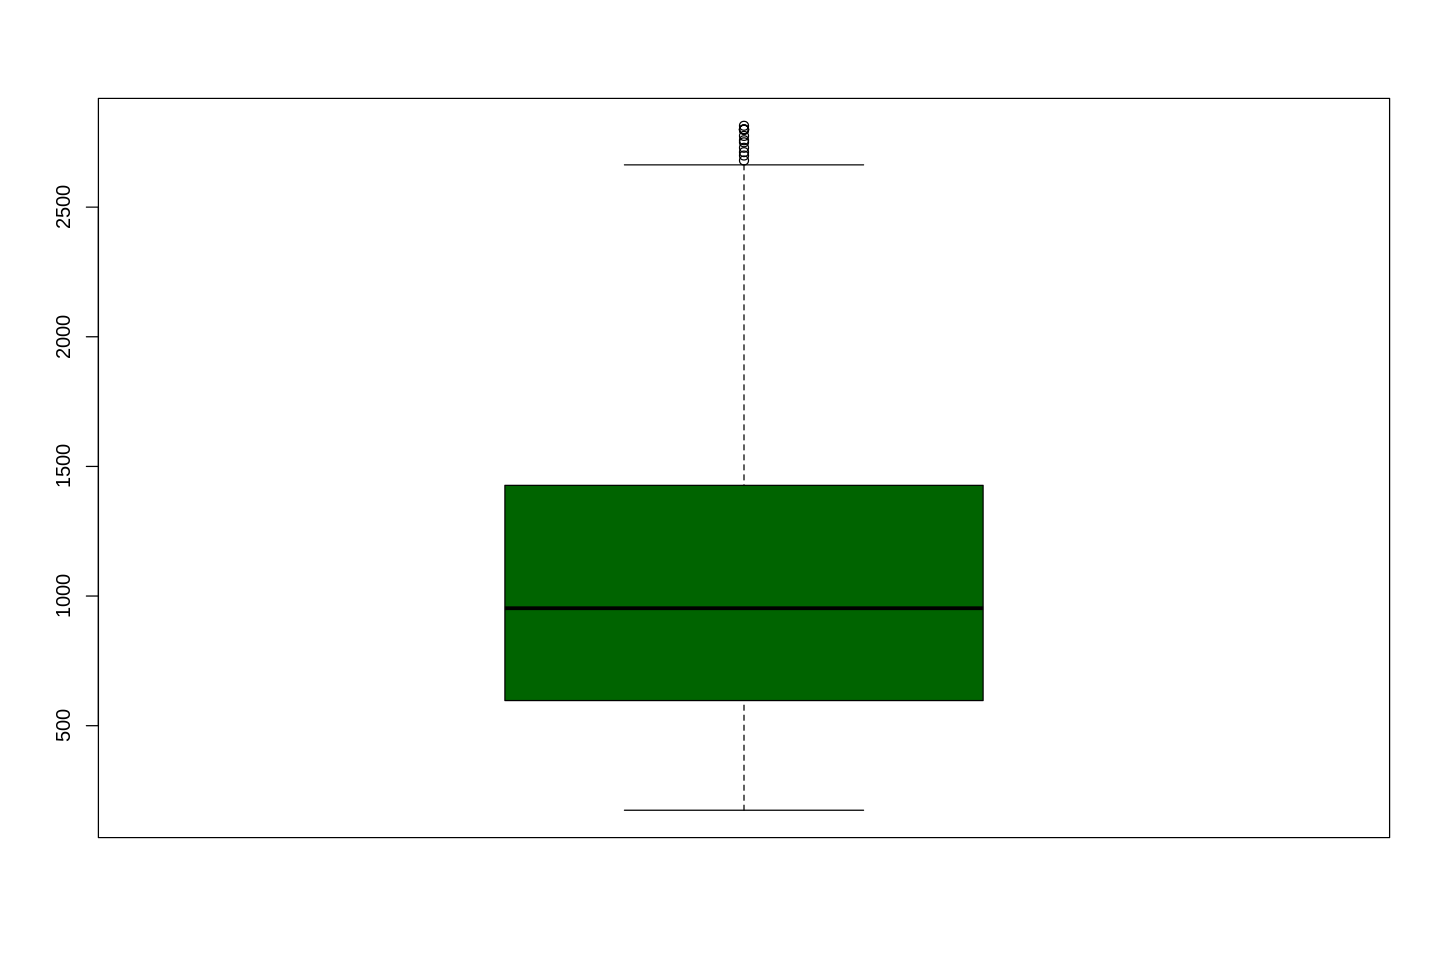

In [13]:
boxplot(laptop_price_processed$Price_euros, col='darkgreen')

# Prueba Shapiro-Wilk (prueba de normalidad)
$
\begin{align}
H_0 &= \text{Nuestros datos de precio se distribuyen normalmente } \\
H_1 &= \text{Nuestros datos de precio no se distribuyen normalmente}
\end{align}
$

In [14]:
shapiro.test(laptop_price_processed$Price_euros)


	Shapiro-Wilk normality test

data:  laptop_price_processed$Price_euros
W = 0.94014, p-value < 2.2e-16


#### Obtenemos un valor muy cercano a cero, por lo que rechazamos la hipótesis nula, y vemos que nuestra variable no se distribuye normalmente 

### Gráficamente tenemos una gráfica QQ que nos muestra una distribución normal como una línea recta en el centro

#### Nuestros datos se muestran en puntos negros

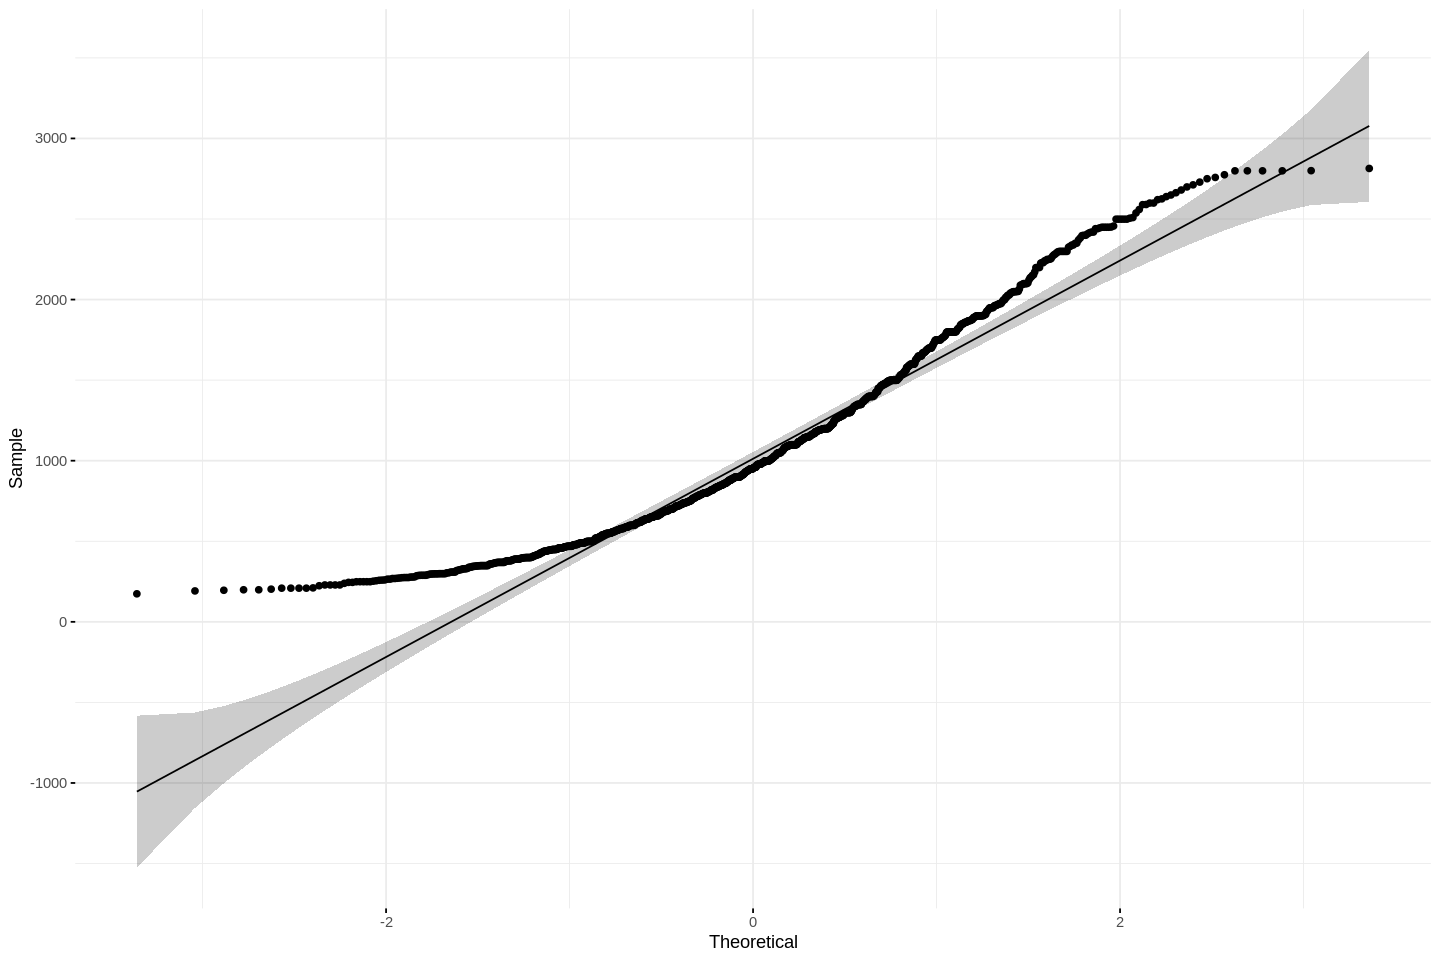

In [15]:
ggqqplot(laptop_price_processed$Price_euros,ggtheme=theme_minimal())

#### La prueba T y Z no asumen una distribución normal, por lo que no hay problema, pero es bueno estar concientes de como se distribuyen nuestros datos

In [16]:
mean_price <- mean(laptop_price_processed$Price_euros)
mean_price

[1] 1070.109

In [17]:
std_price <- sd(laptop_price_processed$Price_euros)
std_price

[1] 596.5789

In [18]:
n_price <- length(laptop_price_processed$Price_euros)
n_price

[1] 1274

### pnorm

La function $\texttt{pnorm(x)}$ regresa el valor de la integral 
$$\texttt{pnorm(x)}=\frac{1}{\sigma \sqrt{2 \pi}} \int_{-\infty}^{x}e^{-(x^{'}-\mu)^2/(2\sigma^2)}dx^{'}$$

,donde x es el valor Z.

$\texttt{pt(q)}$ tiene una propósito similar pero para la distribución de T student, aunque la fórmula es más compleja. Lo importante es recordar que cuando n > 30 calcularemos el valor p utilizando la función pnorm y pt de lo contrario.




In [19]:
test <- function(mean,mu,std,n){
    test_statistic <- (mean-mu)/(std/sqrt(n))
    
    if(n>30){
        p_value <- 2 *pnorm(-abs(test_statistic))
        return(cat('z-test = ', test_statistic, '\np-value',p_value))
    }
    else {
        p_value <- 2* pt(test_statistic, df = n - 1, lower = FALSE)
        return(cat('t-test = ', test_statistic, '\np-value', p_value))
    }   
}

#### Probaremos si nuestro promedio es 1070 a un nivel de significancia del 5%

In [20]:
mu = 1070

test(mean_price,mu,std_price, n_price)

z-test =  0.006512232 
p-value 0.994804

In [21]:
install.packages(c("pastecs","TeachingDemos"))
library(pastecs)
library(TeachingDemos)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [22]:
mu = 1000

price_ztest <- z.test(laptop_price_processed$Price_euros, mu=mu, stdev = std_price)
price_ztest


	One Sample z-test

data:  laptop_price_processed$Price_euros
z = 4.1946, n = 1274.000, Std. Dev. = 596.579, Std. Dev. of the sample
mean = 16.714, p-value = 2.734e-05
alternative hypothesis: true mean is not equal to 1000
95 percent confidence interval:
 1037.350 1102.868
sample estimates:
mean of laptop_price_processed$Price_euros 
                                  1070.109 


In [23]:
names(price_ztest)

[1] "statistic"   "parameter"   "p.value"     "conf.int"    "estimate"   
[6] "null.value"  "alternative" "method"      "data.name"

In [24]:
price_ztest$method

[1] "One Sample z-test"

In [25]:
price_ztest$data.name

[1] "laptop_price_processed$Price_euros"

In [26]:
price_ztest$statistic

z 
4.194591

In [27]:
price_ztest$p.value

[1] 2.733643e-05

In [28]:
price_ztest$conf.int

[1] 1037.350 1102.868
attr(,"conf.level")
[1] 0.95

In [29]:
 price_ztest$estimate

mean of laptop_price_processed$Price_euros 
                                  1070.109

In [30]:
price_ttest<- t.test(x=laptop_price_processed$Price_euros, y = NULL, mu=1000)
price_ttest


	One Sample t-test

data:  laptop_price_processed$Price_euros
t = 4.1946, df = 1273, p-value = 2.923e-05
alternative hypothesis: true mean is not equal to 1000
95 percent confidence interval:
 1037.319 1102.899
sample estimates:
mean of x 
 1070.109 
